# Data Driven Modeling
<hr style="height:3px;border:none;color:stillblue;background-color:black;" />
### PhD seminar series at Chair for Computer Aided Architectural Design (CAAD), ETH Zurich


[Vahid Moosavi](href=https://vahidmoosavi.com/)
<hr style="height:1px;border:none;color:stillblue;background-color:black;" />

<a></a>

# Seventh Session 
<hr style="height:1px;border:none;color:stillblue;background-color:steelblue;" />
<span style="color:steelblue;font-size: 1em;"> 21 November 2017</span>


### Topics to be discussed 

* **Markov Chains**


In [2]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
pd.__version__
import sys
from scipy import stats
import time
from scipy.linalg import norm
%matplotlib inline

# Markov Chains
## Introduced by Andrei Markov in 1906
![](Images/AAMarkov.jpg)

## His original work was on the modeling of stochastic systems, where one is interested to study the sequence of random events and their underlying state space.
## famously he did his work on the sequence of charachters in a language.
## His work is one of the earilest data driven models of the langugae.
## Nevertheless, he didn't succeed, since MC is data driven and computational intensive.
## Later it was used extensively to study dynamical (stochastic) systems.
## Recently, it was used and inspired a lot of data driven representation works.


# We discuss Markov Chains from the following aspects:

* **From the point of view of dynamical systems**
* **From the point of view of relational object representation (next session)**
* **Properties and applications**
* **Extensions to machine learning applications (specially in neuro-probablistic language models in deep learning)**


# Random walks and Markov Property

Text(0.5,0,u'random walks (time)')

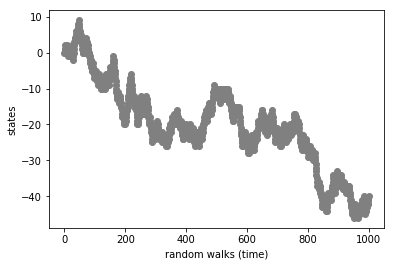

In [287]:
# direction
state=0
all_states= [0]
all_walks= []
n_time  = 1000
for i in range(n_time):
    walk = np.random.choice([-1,1],size=1)[0]
    state = state + walk
    all_states.append(state)
    all_walks.append(walk)
plt.plot(range(n_time+1),all_states,'o-',color='gray')
plt.ylabel('states')
plt.xlabel('random walks (time)')

In [283]:
np.unique(all_states)

array([-4, -3, -2, -1,  0])

# here, each state is only decided from only the previous state (considering that walks are +-1).
# Therefore, the current state as a random variable depends only on the previous state. more formally:
![](https://wikimedia.org/api/rest_v1/media/math/render/svg/978192748ea268d6096da910108113fbfe81e51d)

## This is called Markov property
#### In other words, in this case of one step random walks, knowing about all the previous steps before t-1 is not giving us new information regarding the state t. 

### Now, if we approximate all the one-to-one transition probabilites, we can represent it in a directed graph or in a Matrix format.

# Markov Chians
# Usually we have a matrix, called transition matrix, M
### Where M has certain conditions:
* **Matrix M has equal rows and columns: M is nxn**
* ** n is the number of states in the markov chain**
* **Row (column) Stochastic: Sum of rows (columns) are equal to one**
* ** non-negative elements**
* ** There is always a directed graph associated to M**


### A very basic example, with two states

In [285]:
# state space: Rainy, sunny
M =np.asarray([[.9,.1],[.6,.4]])

print(np.matrix(M)) 
print

# any arbitrary initial point
x = np.asarray([0,1])

print "next probable state:"
print x.dot(M)

[[ 0.9  0.1]
 [ 0.6  0.4]]

next probable state:
[ 0.6  0.4]


In [286]:
# Steady state
print x
for i in range(20):
    x = x.dot(M)
    print x
print x.shape

[0 1]
[ 0.6  0.4]
[ 0.78  0.22]
[ 0.834  0.166]
[ 0.8502  0.1498]
[ 0.85506  0.14494]
[ 0.856518  0.143482]
[ 0.8569554  0.1430446]
[ 0.85708662  0.14291338]
[ 0.85712599  0.14287401]
[ 0.8571378  0.1428622]
[ 0.85714134  0.14285866]
[ 0.8571424  0.1428576]
[ 0.85714272  0.14285728]
[ 0.85714282  0.14285718]
[ 0.85714284  0.14285716]
[ 0.85714285  0.14285715]
[ 0.85714286  0.14285714]
[ 0.85714286  0.14285714]
[ 0.85714286  0.14285714]
[ 0.85714286  0.14285714]
(2,)


# Note: This steady state happpens for certain MCs, but not always!!

# <a></a>
 
# We can think of the markov transition matrix in two ways:

# 1-Cell values as conditional probabilities:

![](https://farm6.staticflickr.com/5733/22412203464_1f190c07c1.jpg)



# 2- Cell values as the the rates of a linear equation system

### Imagine now our states are the numbers of people in two countries, who are migrating to the other country or stays in their home country.
### In this sense, Markov chain is a system of linear equations. 

##  $$x_i(t) = x_i(t-1).M_{1,i} + ... +x_i(t-1).M_{n,i} $$

### This is the case, in many applications: flow of money in an economic network, flow of cars, flow of energy, flow of water, flow of web surfers, ...



<span style="color:red;font-size: 3em;line-height: 100%;"> Markov chain: Probabilistic model (at micro level) and deterministic (at macro level) model</span>


<span style="color:green;font-size: 3em;line-height: 100%;"> A common mistake: Markov chains to be used for prediction of specific sequence</span>

# <a></a>


# Usual Assumptions: 
* ** Time homogeneous transition matrix **
* ** Finite states **
* ** Discrete-time** 


# <a></a>

# Now the data driven part:


<span style="color:red;font-size: 3em;line-height: 100%;"> The beauty of Markov chain is that it is super easy to be constructed from data</span>
 
### We only need sequential observations
### Only basic operations such as addition and multiplication are required.
### And it gets better with more data!!!



# how to construct the Markov Chain?

In [288]:
def buildTM_from_sequential_data(data,states,irreducible=True):
    # each row is a sequence of observation
    n = np.max(states)+1
    M = np.zeros((n,n))
    for d in data:
        for k in range(1,len(d)):
            i = d[k-1]
            
            j = d[k]
            M[i,j]= M[i,j] + 1
    
    eps = .001
    for i in range(M.shape[0]):
        s= sum(M[i])
        
        if s==0:
            if irreducible==True:
                M[i]=eps
                M[i,i]=1.
                s= sum(M[i])
                M[i]=np.divide(M[i],s)
            else:
                M[i,i]=1.
        else:
            M[i]=np.divide(M[i],s)    
    return M

## Back to the random walk example

In [290]:

n_obs = 5
all_walks= []
n_time  = 3
all_seqs = []
for j in range(n_obs):
    all_states= []
    state = np.random.randint(-n_time,high=n_time+1,size=1)[0]
    all_states.append(state)
    for i in range(n_time):
        walk = np.random.choice([-1,1],size=1)[0]
        state = state + walk
        all_states.append(state)
        all_walks.append(walk)
    all_seqs.append(all_states)

data = np.asarray(all_seqs)
mn = np.min(data)
mx = np.max(data)
data = data - mn
print mn, mx
print data
states = np.unique(data)

# If it is irreducible, it will have a steady state alway, other wise, it might oscilate
M = buildTM_from_sequential_data(data,states,irreducible=True)

print(np.matrix(M)) 


-4 4
[[1 0 1 0]
 [7 8 7 8]
 [1 2 3 4]
 [3 4 5 6]
 [3 2 1 2]]
[[  0.00000000e+00   1.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00]
 [  5.00000000e-01   0.00000000e+00   5.00000000e-01   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00]
 [  0.00000000e+00   5.00000000e-01   0.00000000e+00   5.00000000e-01
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   3.33333333e-01   0.00000000e+00
    6.66666667e-01   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   1.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00

### Play with the number of observations, number of time steps in each observation and see their effects on the final markocv chains in terms of steady state vectors and mixing times

In [350]:
n_obs = 5000
all_walks= []
n_time  = 50
all_seqs = []
for j in range(n_obs):
    all_states= []
    state = np.random.randint(-n_time,high=n_time+1,size=1)[0]
    all_states.append(state)
    for i in range(n_time):
        walk = np.random.choice([-1,1],size=1)[0]
        state = state + walk
        all_states.append(state)
        all_walks.append(walk)
    all_seqs.append(all_states)

data = np.asarray(all_seqs)
mn = np.min(data)
mx = np.max(data)
data = data - mn
# print data
states = np.unique(data)
# print states
# If it is irreducible, it will have a steady state alway, other wise, it might oscilate
M = buildTM_from_sequential_data(data,states,irreducible=False)

# print(np.matrix(M)) 
# print 

### Play with the number of iterations and observe the mixing time

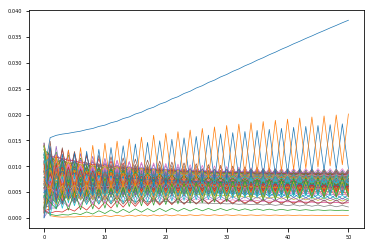

In [351]:
# any arbitrary initial point
x = np.random.rand(np.max(states)+1)

x = x/x.sum()
all_x = []
all_x.append(x)
for i in range(50):
    x = x.dot(M)
    all_x.append(x)
# print x

all_x = np.asarray(all_x)
for i in range(all_x.shape[1]):
    plt.plot(range(len(all_x)),all_x[:,i],linewidth=.7)

## This is how the probabilty values are reaching to the steady state

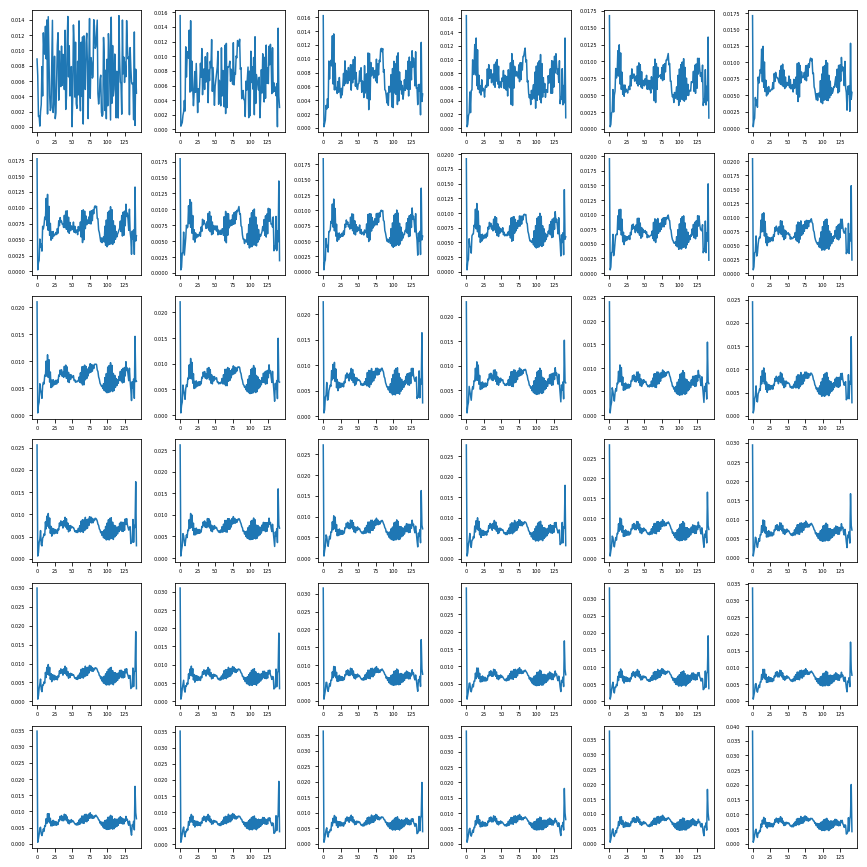

In [352]:
steps = np.around(np.linspace(0,all_x.shape[0]-1,36)).astype(int)
fig = plt.figure(figsize=(12,12))
for i, step in enumerate(steps):
    plt.subplot(6,6,i+1)
    plt.plot(all_x[step,:]);
plt.tight_layout()
font = {'size'   : 5}
plt.rc('font', **font)

# Steady State probabilities
### Perron–Frobenius theorem
https://en.wikipedia.org/wiki/Perron%E2%80%93Frobenius_theorem
### If M is irreducible (strongly connected) and there is no absorbing state, its first eigen vector is equal to the steady state of the underlying dynamical system
#### If we look at MC as a model of a dynamical system, it always end up to a steady state situation


##  $$x_i = \sum_{j = 1}^n x_i. M_{j,i}$$
## $$ x = xM$$

## Power iteration Method

In [146]:

def simulate_markov(TM,verbose='on'):
    e1 = time.time()
    states_n = TM.shape[0]
    pi = np.ones(states_n);  pi1 = np.zeros(states_n);
    pi = np.random.rand(states_n)
   
    pi = pi/pi.sum()
    n = norm(pi - pi1); i = 0;
    diff = []
    while n > 1e-6 and i <1*1e4 :
        pi1 = TM.T.dot(pi).copy()
        n = norm(pi - pi1); i += 1
        diff.append(n)
        pi = pi1.copy()
    if verbose=='on':
        print "Iterating {} times in {}".format(i, time.time() - e1)
    
    mixing_ = i
    return pi1,mixing_

# Now examples with Dynamical systems
#### comparable with the random walk example
### Lorenz curve

Text(0.5,0,u'time steps')

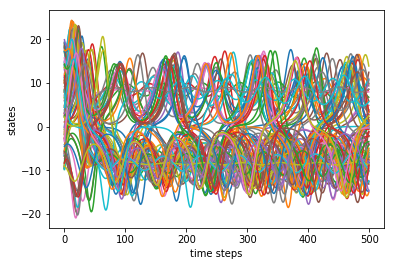

In [221]:
import numpy as np
from scipy import integrate

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import cnames
from matplotlib import animation
%matplotlib inline
N_trajectories = 1000


def lorentz_deriv((x, y, z), t0, sigma=10., beta=8./3, rho=28.0):
    """Compute the time-derivative of a Lorentz system."""
    return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]


# Choose random starting points, uniformly distributed
x0 = -10 + 30 * np.random.random((N_trajectories, 3))

# Solve for the trajectories
t = np.linspace(0, 5, 500)
x_t = np.asarray([integrate.odeint(lorentz_deriv, x0i, t)
                  for x0i in x0])


# this is just one dimension
for i in range(100):
    plt.plot(x_t[i,:,0])
plt.ylabel('states')
plt.xlabel('time steps')

# Note: Here, we have a continuous state space

## One important problem of Markov Chains is State Space explosion
## One possible solution would be to learn the high dimensional manifold using methods such as SOM and index that space with low dimensional indices. Then, compute Markov Chain with the new indexes.
### Some early tries I did: 
**Vahid, Moosavi, Computing With Contextual Numbers. arXiv preprint arXiv:1408.0889. (2014).**



## Here, we just assume one dimensional state space
## We do some coarse graining and descretization on the state space

(51,)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50]
51
(1000, 100)


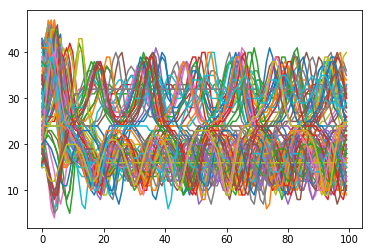

In [298]:
data = x_t[:,:,0]/1
data = data.astype(int)
print np.unique(data).shape

data = data-np.min(data)

data = data[:,range(0,data.shape[1],5)]
print np.unique(data)
print len(np.unique(data))
print data.shape
for i in range(100):
    plt.plot(data[i,:])

In [299]:
# We can buid a markov chain out of this data
n_state = np.unique(data).shape[0]
states = np.arange(0,n_state)
M = buildTM_from_sequential_data(data,states,irreducible=False)
# print(np.matrix(M)) 

Iterating 381 times in 0.00606393814087


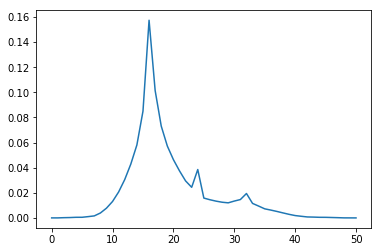

In [300]:
# The meaning of steady state distribution
# How to interpret this?
pi, _ = simulate_markov(M,verbose='on')
plt.plot(pi);

## One important point: Markov transition matrix can only tell us about the limiting distribution!

# But now if we want to see the dynamics of a single trajectory

In [303]:
# any arbitrary initial point: here, it means a one-hot vector. initially only one state is one and the rest is zero
ind_initial = np.random.randint(0,n_state,size=1)
print ind_initial
x = np.zeros((1,n_state))
x[0,ind_initial] = 1
# print x

x = x/x.sum()
all_x = []
all_x.append(x)
for i in range(100):
    x = x.dot(M)
    all_x.append(x)

all_x = np.asarray(all_x)

[42]


# Because of the probabilistic nature of Markov Chain, it calculates all the possible combinations together. 

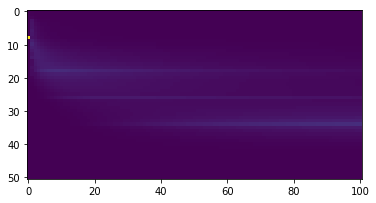

In [304]:
state_pic = all_x[:,0,:].copy()
plt.imshow(state_pic.T[::-1]);

# The other way, would be to take a path selection strategy in each time step
# Let's pick the actions based on their conditional probabilities
# Here, is the connecting point between Markov Chains and Markov Decision Process and Reinforcement Learning

In [305]:
all_inds = []
ind_initial = np.random.randint(0,n_state,size=1)

ind = ind_initial[0]
all_inds.append(ind)
for i in range(100):
    ind = np.random.choice(range(M.shape[0]),size=1,p=M[ind])[0]
    all_inds.append(ind)

Text(0.5,0,u'time step')

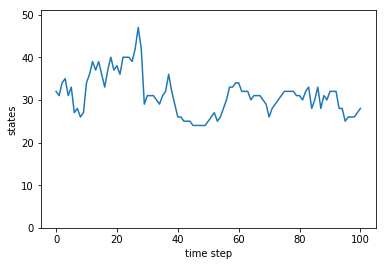

In [306]:
plt.plot(all_inds)
plt.ylim((0,n_state))
plt.ylabel('states')
plt.xlabel('time step')

# Important points:

## If we look at the problem of single trajectory, we have the problem of time series prediction. 
## In fact, this Markov chain is providing a "very naive time series model", where the next step is provided only based on the current state. 
## For this purpose, there are much better methods

## Therefore, it is not recommended to use a Markov chain for the prediction of a single path. 
## On the other hand, Markov chain has very interesting features, if one is interested in the overal macroscopic properties of dynamical systems, for example in:
* **Water flow**
* **Traffic Dynamics**
* **Economic networks**
* **WWW**
* **Electricity Network**
* **Flight dynamics**

# Some of the very interesting properties of Markov chains:
* **Steady state probabilities**
* **Clustering the state space**
* **Mixing times**
* **Recurrence time**
* **Mean first passage time**
* **Kemeny Constant**
* **Sensitivity analysis of the transition matrix**

# First Example:
## Transportation Dynamics
**Vahid, Moosavi and Ludger Hovestadt. “Modeling urban traffic dynamics in coexistence with urban data streams.” Proceedings of the 2nd ACM SIGKDD International Workshop on Urban Computing. ACM, 2013.** 
https://vahidmoosavi.files.wordpress.com/2013/09/modeling-urban-traffic-dynamics-in-coexistence-with-urban-data-streams.pdf


### the basic idea is that we start with a collection of traces of cars across a city.
### This is the only data we use for modeling the dynamics of traffic in a city

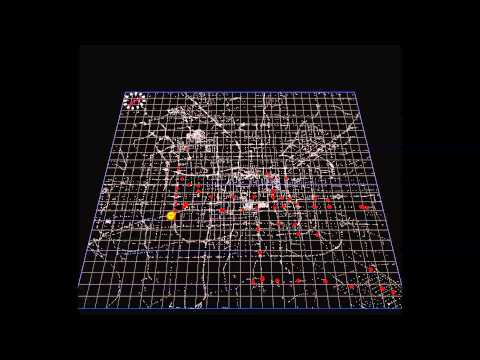

In [307]:
from IPython.display import YouTubeVideo
YouTubeVideo('0aQxJgHknGs',width=700, height=600)

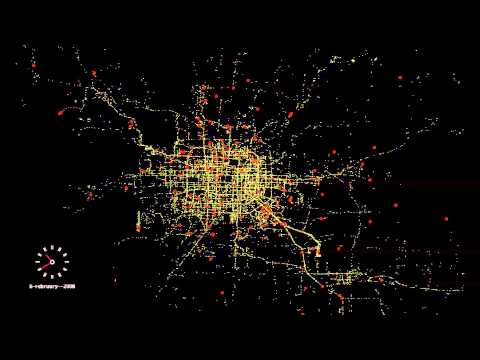

In [24]:
from IPython.display import YouTubeVideo
YouTubeVideo('D6XTyLbO13w',width=700, height=600)

# Can we encapsulate the probablistic patterns via a Markov chain?
## This is opposite to explicit models which try to model the dynamics of each individual agent.

![](Images/Traffic_Markov_1.png)

![](Images/Traffic_Markov_2.png)

# Second Example: Macro-Economic Network
## Relational (networked) economic models

Vahid Moosavi, Giulio Isacchini “A Markovian Model of the Evolving World Input-Output Network.” PLOS ONE, 2017
[link](http://journals.plos.org/plosone/article?id=10.1371/journal.pone.0186746)

https://sevamoo.github.io/Markovian_IO_SI_PLOSONE/

### The proposed Markov model from input-output table
###### Here, we assume two economies each with one industry
![](Images/Fig1.png)



##### However, considering the changes in the values of Input-output models, we have a kind of time varying markov chain. Similarly, we assume 
##### we have a time series of stationary markov chains, where for each year we fit one markov chain

##### In this experiment, we have focused on 41 economies (countries) with 35 industries within each economy interacting with other industries and economies

### Robert Solow 1952 had talked about the relationships between Leontief input-output models and markov chains as their algebraic formalism

In [32]:
economy_n = 41
industry_n = 35
header = pd.read_csv('./Data/WIOD/header.csv',header=None)
economy_names =header.values[1,range(0,1435,35)]
industry_names =header.values[0,range(0,35)]
Countries =pd.read_csv("./Data/WIOD/Economies_Names.csv")
VA = pd.read_csv('./Data/WIOD/VAs.csv',index_col=[0])

In [33]:
WIO = list()
for i in range(1995,2012):
    d = pd.read_csv('./Data/WIOD/wiot'+str(i)+'_row_apr12.csv',header=[0,1,2])
    WIO.append(d.values[:])
    print i, d.shape

1995 (1435, 1640)
1996 (1435, 1640)
1997 (1435, 1640)
1998 (1435, 1640)
1999 (1435, 1640)
2000 (1435, 1640)
2001 (1435, 1640)
2002 (1435, 1640)
2003 (1435, 1640)
2004 (1435, 1640)
2005 (1435, 1640)
2006 (1435, 1640)
2007 (1435, 1640)
2008 (1435, 1640)
2009 (1435, 1640)
2010 (1435, 1640)
2011 (1435, 1640)


### Using Power Iteration to calculate the steady state probabilities, Pi


In [34]:
def aggregate_economy_int_consumptions(WIOT,VA_y):
    economy_n = 41
    industry_n = 35
    economy_int_consumptions_n =1 
    economy_produsction_costs_n=1
    states_n = economy_n*industry_n+economy_n*1+industry_n*1
    
    economy_income = np.zeros((economy_n*industry_n,economy_n))
    economy_int_consumptions = np.zeros((economy_n*industry_n,economy_n))
    ind = economy_n*industry_n
    for i in range(economy_n):
        col = i*5+ind
        economy_int_consumptions[:,i]=WIOT[:,col:col+5].sum(axis=1)
    
    #I don't know why but sometimes it gets a bit negative?!!! due to change in inventory (5th column of economy consum)
    economy_int_consumptions[economy_int_consumptions<0]=0
    
    industry_produsction_costs = np.around(WIOT[:].sum(axis=1)-WIOT[:,:economy_n*industry_n].sum(axis=0)-VA_y,decimals=3)

    
    return economy_int_consumptions,industry_produsction_costs
        
def build_markov_chain_Dense(Q,WIOT,economy_n,industry_n,economy_int_consumptions,industry_produsction_costs):
    e0 = time.time()
    eps = .001
#     economy_n = 41
#     industry_n = 35
#     economy_int_consumptions_n =1 
#     economy_produsction_costs_n=1
    
    for i in range(0,economy_n*industry_n):
        
        #For industry interactions
        for j in range(0,economy_n*industry_n):
            Q[i,j]=WIOT[j,i]
        
        #For payments of industry to its economy: This is the source of income for the economy
        economy_ind_industry = i/industry_n
        Q[i,economy_n*industry_n+economy_ind_industry]=industry_produsction_costs[i]
        
        #For economy's costs (i.e. consumptions)
        ind_economy_inTM = economy_n*industry_n
        
        for j in range(economy_n):
            Q[j+ind_economy_inTM,i]=economy_int_consumptions[i,j]

    singular_industries = [] 
    for i in range(Q.shape[0]):
        s= sum(Q[i])
        if s==0:
            singular_industries.append(i%economy_n)
            Q[i]=eps
            Q[i,i]=1.
            s= sum(Q[i])
            Q[i]=np.divide(Q[i],s)
        else:
            Q[i]=np.divide(Q[i],s)        
    print "Making the TM in {} second".format(time.time() - e0)
#     print np.unique(singular_industries)
#     print "Transition Matrix is ready!"
    return np.around(Q,decimals=10),list(np.unique(singular_industries))
def simulate_markov(TM,verbose='on'):
    e1 = time.time()
    states_n = TM.shape[0]
    pi = np.ones(states_n);  pi1 = np.zeros(states_n);
    pi = np.random.rand(states_n)
    # pi[np.random.randint(1,high=size-1, size=1000)] = 1;
    

#     pi[np.random.randint(1,high=states_n, size=int(.1*states_n))] = np.random.rand(int(.1*states_n));
    pi = pi/pi.sum()
#     print pi.shape
#     print pi.sum()
    # pi[range(int(.1*size))] = 1;

    n = norm(pi - pi1); i = 0;
    diff = []
    while n > 1e-6 and i <1*1e4 :
        pi1 = TM.T.dot(pi).copy()
        n = norm(pi - pi1); i += 1
        diff.append(n)
        pi = pi1.copy()
    if verbose=='on':
        print "Iterating {} times in {}".format(i, time.time() - e1)
    
    mixing_ = i

    return pi1,mixing_
    

In [35]:
Pi =[]
TMs = []
Mixing_times =[]
singular_ids = []
fig3 = plt.figure(figsize=(15,7))
for i,WIOT in enumerate(WIO):
    VA_y = VA.values[i]
    VA_y = np.zeros(VA.values[0].shape[0])
    economy_int_consumptions,industry_produsction_costs = aggregate_economy_int_consumptions(WIOT,VA_y)
#     economy_int_consumptions,industry_produsction_costs = aggregate_economy_int_consumptions(WIOT)
    economy_n = 41
    industry_n = 35
    states_n = economy_n*industry_n+economy_n
    # Q = pysparse.spmatrix.ll_mat(states_n,states_n)
    TM = np.zeros((states_n,states_n))
    TM, singular_id = build_markov_chain_Dense(TM,WIOT,economy_n,industry_n,economy_int_consumptions,industry_produsction_costs)
    TMs.append(TM)
    singular_ids.extend(singular_id)
    t,mixing_ = simulate_markov(TM)
    Pi.append(t)
    Mixing_times.append(mixing_)

singular_ids = np.unique(singular_ids)
#     pl = plt.plot(t)
#     pl = plt.plot(t[economy_n*industry_n:])
#     p =plt.xticks(range(economy_n),economy_names,rotation=45)


Making the TM in 0.599362850189 second
Iterating 290 times in 0.162364006042
Making the TM in 0.623116016388 second
Iterating 258 times in 0.15501999855
Making the TM in 0.619567871094 second
Iterating 251 times in 0.152662038803
Making the TM in 0.620247840881 second
Iterating 259 times in 0.153599977493
Making the TM in 0.629685163498 second
Iterating 263 times in 0.159816026688
Making the TM in 0.595637083054 second
Iterating 241 times in 0.133587837219
Making the TM in 0.614474058151 second
Iterating 228 times in 0.129050970078
Making the TM in 0.65242099762 second
Iterating 227 times in 0.127729892731
Making the TM in 0.625109195709 second
Iterating 222 times in 0.126242160797
Making the TM in 0.646955013275 second
Iterating 209 times in 0.12179684639
Making the TM in 0.613920927048 second
Iterating 189 times in 0.108727931976
Making the TM in 0.763463973999 second
Iterating 172 times in 0.106417894363
Making the TM in 0.687242984772 second
Iterating 168 times in 0.103770971298
Ma

### 1- Mixing times
#### As an index of globalization

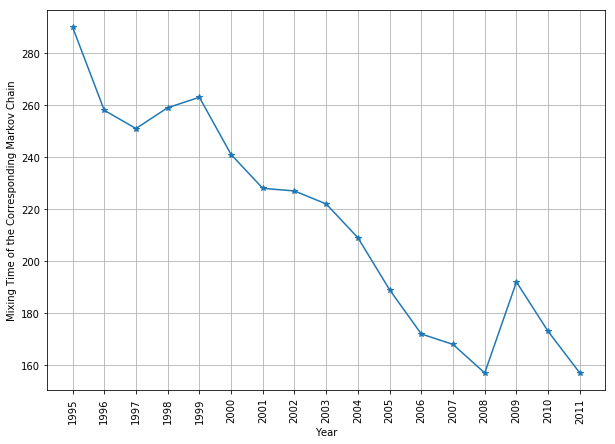

In [36]:
#MIXING TIME: TIME OR ITERATIONS REQUIRED TO REACH TO STEADY STATE. THIS IS A DIRECT MEASURE TO SHOW HOW CONNECTED THE 
#NETWORK IS. MORE MODULAR NETWORK MORE ITERATIONS REQUIRED TO REACH TO STEADY STATE

fig = plt.figure(figsize=(10,7))
plt.plot(Mixing_times,"*-")
label = range(1995,2012)
# plt.title('Mixing Times')
plt.xticks(range(17),label,rotation=90)
plt.xlabel('Year')
plt.ylabel('Mixing Time of the Corresponding Markov Chain')
plt.grid()
#Why every year the TM reaches to steady state faster?

### 4- Kemeny Constant
### Kemeny Constant is indicating a similar aspect to what mixing time offers. Kemeny constant in the context of economic network shows the inverse of average speed of monetary flow (i.e. the average number of steps that one unit of money is taking to start from any given state to any other state in a stationary condition).  
### If Kemeny constant is high this says we have less connected network, since there are less chances to go from one node in a community to another node in another community. Therefore, the average time will increase.

In [37]:
def Kemeny_constant(MC):
    from scipy.linalg import eig
    eigval, vl, vr = eig(MC, left=True)
    eigval = np.real(eigval)
    vl = np.real(vl)
    
    eigvec_1 = vl[:,np.argmax(np.abs(eigval))]/vl[:,np.argmax(np.abs(eigval))].sum()
    ind = np.around(eigval,decimals=8)!=1
#     print ind
#     print eigval
    return np.divide(1,(1-eigval[ind])).sum(),eigvec_1


In [38]:
Kemenys = []
i = 0
for TM in TMs:
    K, pi = Kemeny_constant(TM)
    Kemenys.append(K)
    i+=1
    print i

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17


Text(0,0.5,u'Kemeny Constant of the Corresponding Markov Chain')

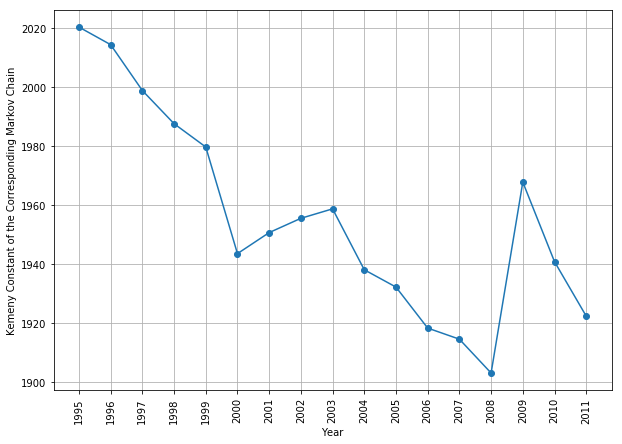

In [39]:
fig = plt.figure(figsize=(10,7))
plt.plot(Kemenys,'o-')
label = range(1995,2012)
plt.xticks(range(17),label,rotation=90)
plt.grid()
plt.xlabel('Year')
plt.ylabel('Kemeny Constant of the Corresponding Markov Chain')

## 2-Stationary distibutiotns, Pis
### What are the structurally strongest industries or who has the highest market share


1476


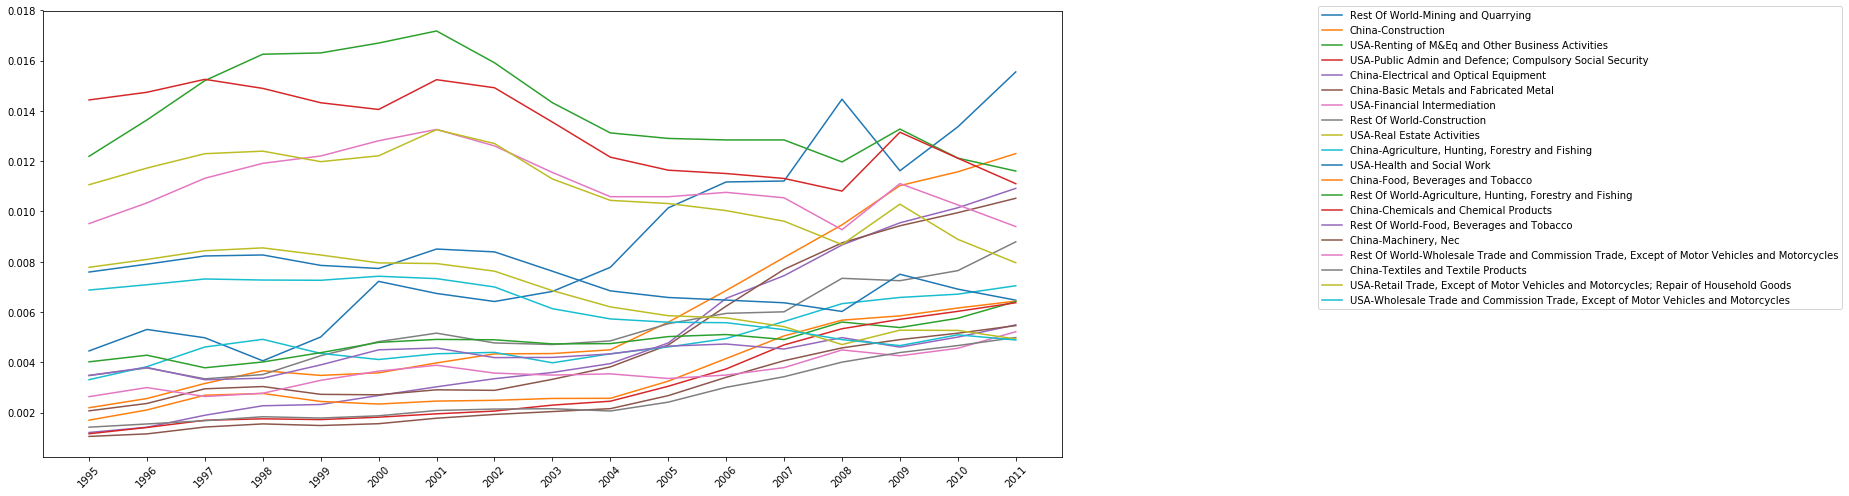

In [40]:
names = []
for i,eco in enumerate(Countries.Country):
    for j,ind in enumerate(industry_names):
        names.append(eco+"-"+ind)
for i,eco in enumerate(Countries.Country):
    names.append(eco+"-"+"Government")

print len(names)
Data_all = np.asarray(Pi).T
what_to_plot = Data_all

# fig = plt.figure(figsize=(15,7))
# np.argsort(what_to_plot[:industry_n*economy_n][:,2])[::-1]
DF = pd.DataFrame(data=what_to_plot[:economy_n*industry_n],columns=range(1995,2012),index=names[:economy_n*industry_n])
DF = DF.sort_values([2011],ascending=False)
DF.head()

ax = DF.T.plot(DF.T.index,DF.T.columns[:20],xticks=range(1995,2012),rot=45)
fig = ax.get_figure()

ax.legend(bbox_to_anchor=(1.77,1.021))
fig.set_size_inches(15,7)
plt.tight_layout()
font = {'size'   : 12}
plt.rc('font', **font)


# Analysis at the county level

### World total production has been growing annually.
###### But what is interesting to know the relative share of economies in this growing pattern not in an isolated view which is the case in GDP growth

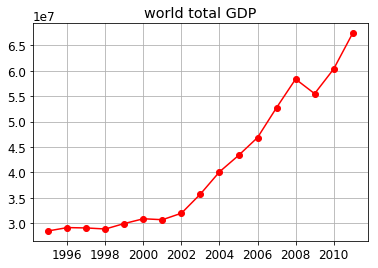

In [41]:
plt.title('world total GDP')
# plt.plot(range(1995,2012),GDP_USD_Selected_Countries.ix[:,5:22].sum(axis=0),'o-r')
plt.plot(range(1995,2012),VA.sum(axis=1),'o-r')
plt.grid()

# GDP trends of Economies

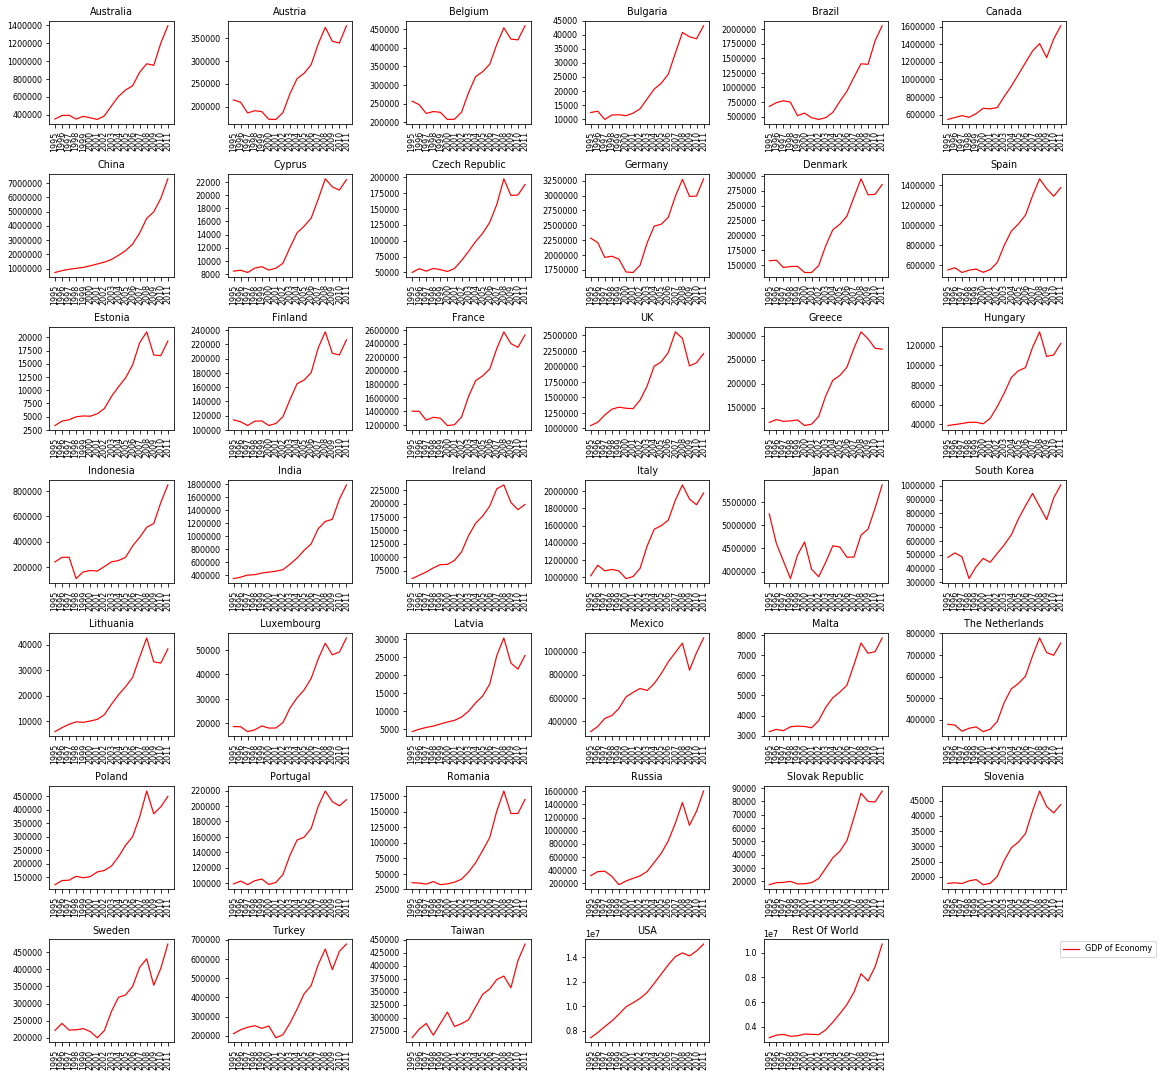

In [251]:
Data_all = np.asarray(Pi).T
# Data_all = Data_all[:economy_n*industry_n]

fig = plt.figure(figsize=(15,15))

GDP_shares = np.zeros((economy_n,17))
Economies_shares = np.zeros((economy_n,17))
for i in range(economy_n):
    ind_indusrty =   range(i*industry_n,(i+1)*industry_n)
    GDP_shares[i]=VA.values[:,ind_indusrty].sum(axis=1)
    plt.subplot(7,6,i+1)
    plt.title(Countries.Country[i])
    
    plt.plot(range(17),GDP_shares[i],'-r',linewidth=1.2,label='GDP of Economy')
    label = range(1995,2012)
    plt.xticks(range(17),label,rotation=90)
    

    plt.tight_layout()
#     plt.grid()
plt.legend(bbox_to_anchor=(3.19,1.022))
# fig.savefig(path,dpi=100)
font = {'size'   : 6}
plt.rc('font', **font)

# GDP share trends 

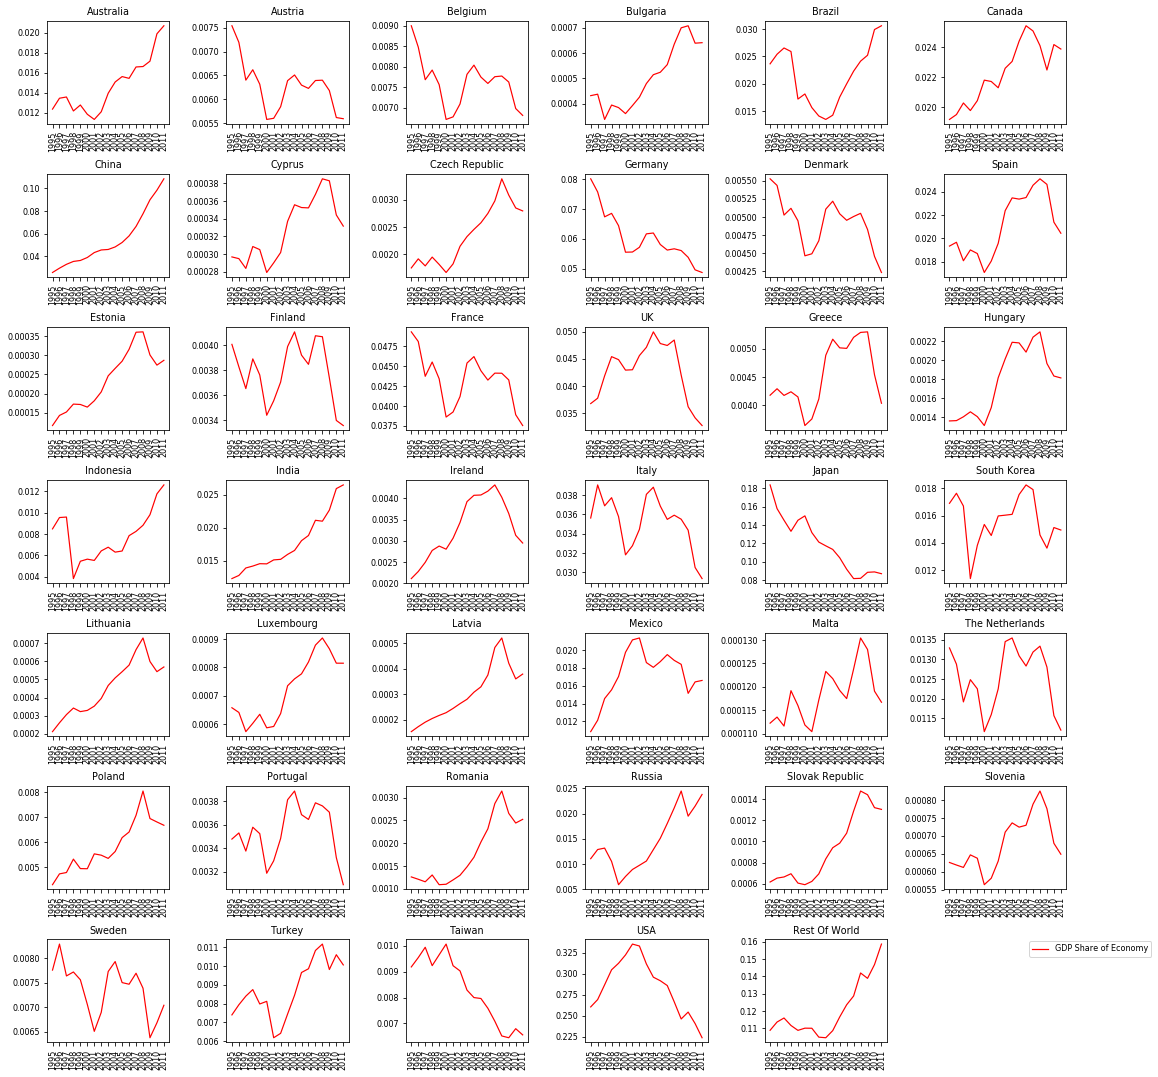

In [252]:
font = {'size'   : 8}
plt.rc('font', **font)
fig = plt.figure(figsize=(15,15))
GDP_shares = np.zeros((economy_n,17))
Economies_shares = np.zeros((economy_n,17))
for i in range(economy_n):
    ind_indusrty =   range(i*industry_n,(i+1)*industry_n)
    GDP_shares[i]=VA.values[:,ind_indusrty].sum(axis=1)/VA.values[:].sum(axis=1)
    plt.subplot(7,6,i+1)
    plt.title(Countries.Country[i])
    
    plt.plot(range(17),GDP_shares[i],'-r',linewidth=1.2,label='GDP Share of Economy')
    label = range(1995,2012)
    plt.xticks(range(17),label,rotation=90)
    

    plt.tight_layout()
#     plt.grid()
plt.legend(bbox_to_anchor=(3.19,1.022))
# fig.savefig(path,dpi=100)


# Trends of steady state probabilities
## We expect stationary probabilites to correlate with GDP share

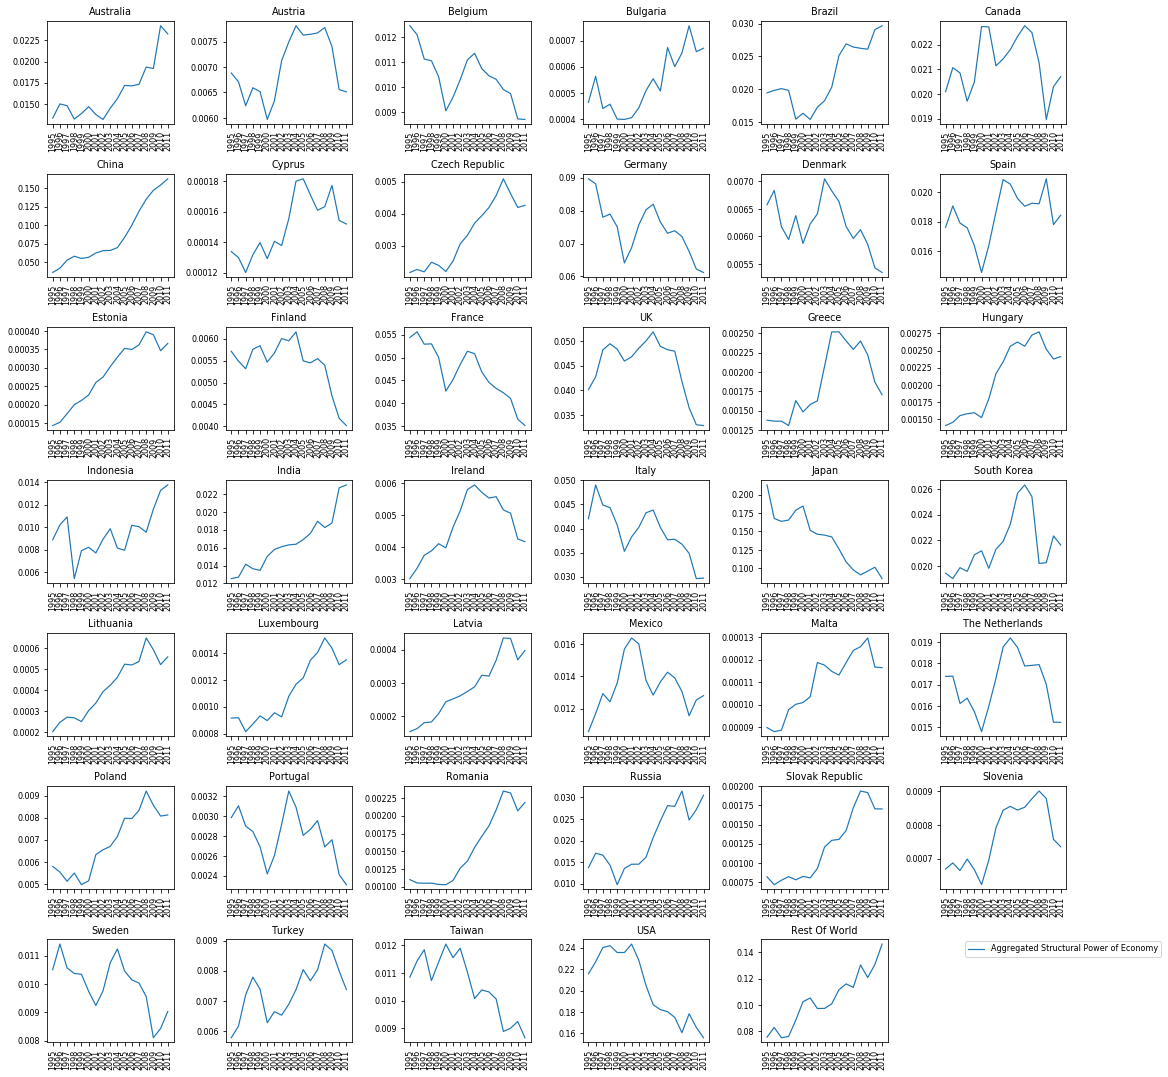

In [253]:

Data_all = np.asarray(Pi).T
# Data_all = Data_all[:economy_n*industry_n]

fig = plt.figure(figsize=(15,15))

Economies_shares = np.zeros((economy_n,17))
for i in range(economy_n):
    plt.subplot(7,6,i+1)
    plt.title(Countries.Country[i])
    
    ind_indusrty = range(i*industry_n,(i+1)*industry_n)+ [industry_n*economy_n+i]
    Economies_shares[i]=Data_all[ind_indusrty].T.sum(axis=1)
    plt.plot(range(17),Economies_shares[i],linewidth=1.2,label='Aggregated Structural Power of Economy')
#     plt.plot(range(17),GDP_shares[i],'-r',linewidth=1.2,label='GDP Share of Economy')
    label = range(1995,2012)
    plt.xticks(range(17),label,rotation=90)
    

    plt.tight_layout()
#     plt.grid()
plt.legend(bbox_to_anchor=(3.19,1.022))
font = {'size'   : 8}
plt.rc('font', **font)

# Interesting thing happens when you compare them together
# this comparison shows in principle, we have 4 different types of economy, based on two factors of "trend of structural power" and the "degree of risk"

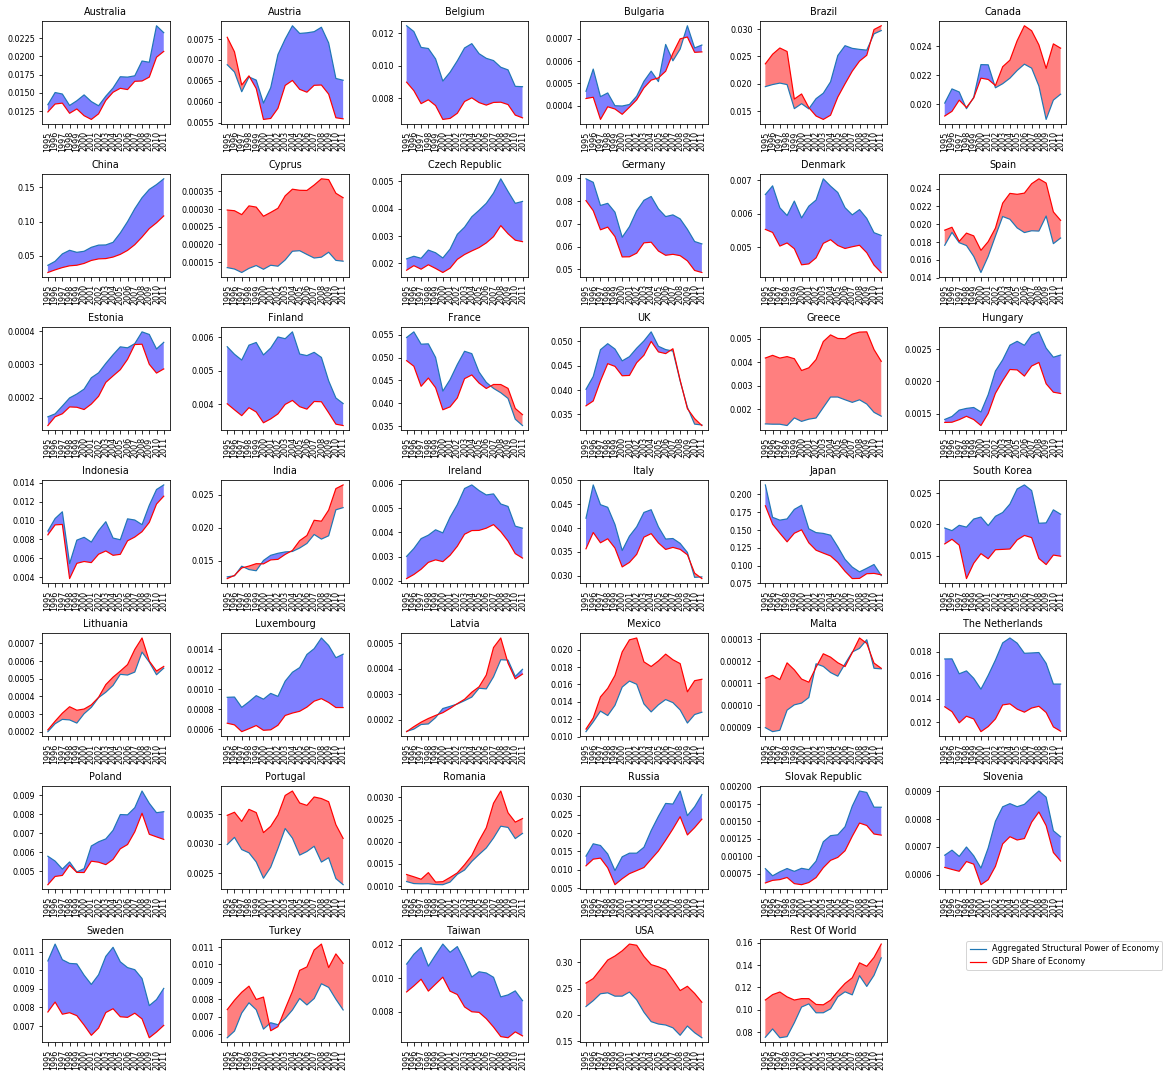

In [254]:
#GPD share and Pi share
Data_all = np.asarray(Pi).T
# Data_all = Data_all[:economy_n*industry_n]

fig = plt.figure(figsize=(15,15))

#To remove Taiwan from the list, since its GDP is not known based on UN DB
ind_economies_UN = range(38)+[39]
GDP_shares = np.zeros((economy_n,17))
Economies_shares = np.zeros((economy_n,17))
Counties_names_in_UN = []

for i in range(economy_n):
    ind_indusrty =   range(i*industry_n,(i+1)*industry_n)
    GDP_shares[i]=VA.values[:,ind_indusrty].sum(axis=1)/VA.values[:].sum(axis=1)
    

    plt.subplot(7,6,i+1)
    plt.title(Countries.Country[i])
    ind_indusrty = range(i*industry_n,(i+1)*industry_n)+ [industry_n*economy_n+i]
    Economies_shares[i]=Data_all[ind_indusrty].T.sum(axis=1)
    plt.plot(range(17),Economies_shares[i],linewidth=1.2,label='Aggregated Structural Power of Economy')
    plt.plot(range(17),GDP_shares[i],'-r',linewidth=1.2,label='GDP Share of Economy')
    y1 = Economies_shares[i]
    y2 = GDP_shares[i]
    x = range(17)
    
    
    
    plt.fill_between(x, y1, y2, where=y2 >= y1, facecolor='red',alpha=.5, interpolate=True)
    plt.fill_between(x, y1, y2, where= y2 <= y1, facecolor='blue', alpha=.5,interpolate=True)
    label = range(1995,2012)
    plt.xticks(range(17),label,rotation=90)
    

    plt.tight_layout()
#     plt.grid()
plt.legend(bbox_to_anchor=(3.19,1.022))
font = {'size'   : 8}
plt.rc('font', **font)

## Now if we look at this ratio over time...

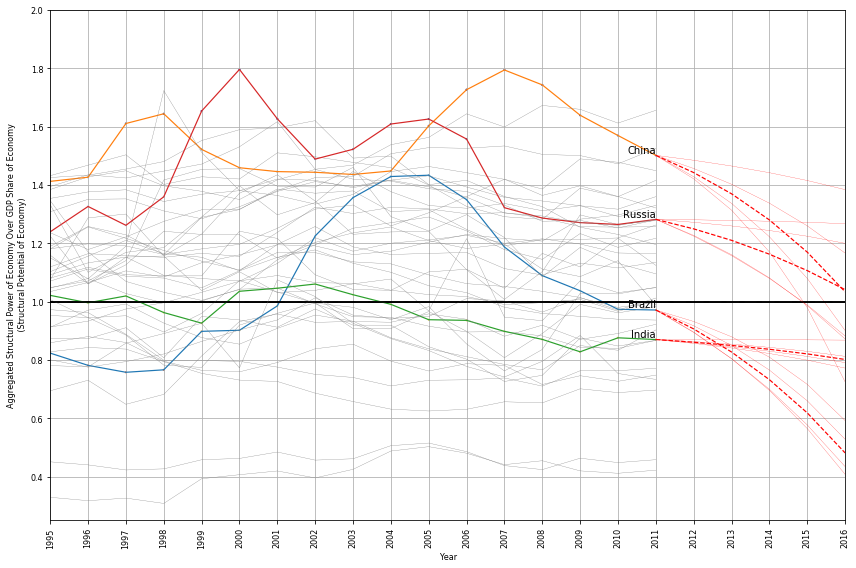

In [256]:
def update_by_momentum(series,span,pred_period):
    result = [] # first value is same as series
    vals = series[-span-1:]
    for n in range(pred_period):
        momentum_avg = np.mean(np.diff(vals))
        result.append(vals[-1] +momentum_avg )
        vals[-1]= result[-1]

    return result


fig = plt.figure(figsize=(12,8))

min_x = np.min(Economies_shares[:,:]/GDP_shares[:,:])
min_y = np.min(GDP_shares[:,:])

max_x = np.max(Economies_shares[:,:]/GDP_shares[:,:])
max_y = np.max(GDP_shares[:,:])
eps = .02

for c in range(economy_n):
#     plt.subplot(7,6,c+1)
#     plt.title(Counties_names_in_UN[c])
    
    x = Economies_shares[c,:]
    color = Economies_shares[c,:]/GDP_shares[c,:]
    x = range(17)
#     color = range(17)
    y = GDP_shares[c,:]
    y = Economies_shares[c,:]
    y = Economies_shares[c,:]/GDP_shares[c,:]
    
    min_x = np.min(Economies_shares[c,:])
    min_y = np.min(GDP_shares[c,:])
    min_min = np.min([min_x,min_y])

    max_x = np.max(Economies_shares[c,:])
    max_y = np.max(GDP_shares[c,:])
    max_max = np.max([max_x,max_y]) 
    eps = .02
    
#     lim = max(max(y),max(x))
#     lim_min = min(min(y),min(x))
#     eps = .05*lim
    ax = plt.gca()
    pred_period = 5
    col = 0
    if Countries.Country[c] in ["Brazil","Russia","China","India"]:
        ax.plot(x,y,'-',linewidth=1.2)
        
        
        all_preds = []
        for span in range(3,7):
            series = y.copy()
            
            y_pred  =update_by_momentum(series,span,pred_period)
            all_preds.append(y_pred)
            y_pred = list(y[-1:]) + y_pred
            x_pred = x[-1:]+ range(17,17+pred_period)
            ax.plot(x_pred,y_pred,'-r',linewidth=0.2)
        y_pred = list(y[-1:]) + list(np.median(all_preds,axis=0))
        x_pred = x[-1:]+ range(17,17+pred_period)
        ax.plot(x_pred,y_pred,'--r',linewidth=1.2)
        
        
        
        ax.scatter(x,y,vmax=1.7,vmin=0.5,c=color,s=20,marker='.',edgecolor='None', cmap='RdYlBu' ,alpha=1)
        ax.annotate(Countries.Country[c], size=10,xy = (x[16],y[-1]+.002), xytext = (0, 0),
                 textcoords = 'offset points', ha = 'right', va = 'bottom')
    else:
        ax.plot(x,y,'gray',linewidth=.3)
    
    
#     ax.set_yscale('log')
#     ax.set_xscale('log')
#     #Linear line
#     ax.plot([min_min,max_max],[min_min,max_max],'-b',linewidth=.2)
    ax.plot([0,16+pred_period],[1,1],'--k',linewidth=.2)
    
    plt.ylim([.25,2])
    plt.xlim([0,16+pred_period])
    
    
    plt.ylabel('Aggregated Structural Power of Economy Over GDP Share of Economy\n (Structural Potential of Economy)')
    plt.xlabel('Year')
    plt.xticks(range(17+pred_period),range(1995,2012+pred_period), rotation='vertical')
#     plt.xticks([])
#     plt.yticks([])
    plt.grid()
    plt.tight_layout()
    font = {'size'   : 10}
    plt.rc('font', **font)
   

# Sensitivity Analysis and Systemic Risks
## What if we slightly change the values of the Markov chains?

### We defined two measures as "Systemic Influence" and "Systemic Fragility", which measure how many times economies influence and get influenced by (from) the changes of the economies activities change. 
### For example, we slow down the activity of one inducstry by changing the corresponding values in the row and columns of the Markov chain and then, compare the steady state probabilities before and after change

In [257]:
# We have precomputed them before
whichyearnetwork = 2011
How_much_change = -99

Kemeny_Change_PCTpath = "./Data/WIOD/Kemeny_Change_PCT_How_much_change_"+str(How_much_change)+"_year_"+str(whichyearnetwork)+".csv"
Kemeny_Change_PCT = pd.read_csv(Kemeny_Change_PCTpath,index_col=0)

pi_perturbedpath = "./Data/WIOD/pi_perturbed_How_much_change_"+str(How_much_change)+"_year_"+str(whichyearnetwork)+".csv"
pi_perturbed = pd.read_csv(pi_perturbedpath,index_col=0)

pi_normalpath = "./Data/WIOD/pi_normal_How_much_change_"+str(How_much_change)+"_year_"+str(whichyearnetwork)+".csv"
pi_normal = pd.read_csv(pi_normalpath,index_col=0)

pi_diff_path ="./Data/WIOD/PerturbationOnIndustries_Change_PCT_How_much_change_"+str(How_much_change)+"_year_"+str(whichyearnetwork)+".csv"
pi_diff = pd.read_csv(pi_diff_path,index_col=0)

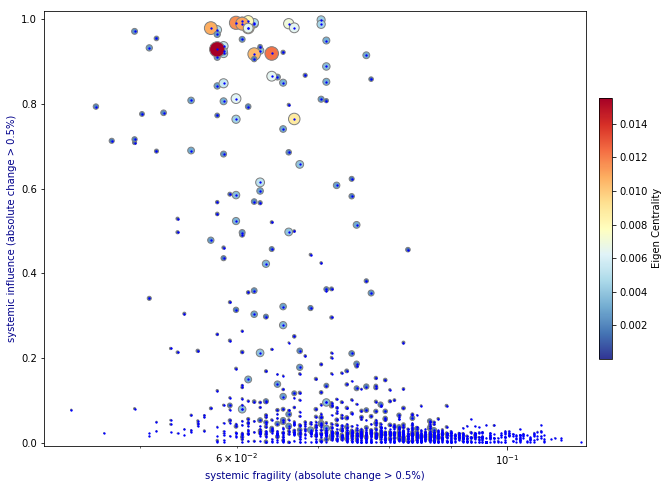

In [48]:
#Systemic Influence Vs. Systemice Fragility


#Threshold of change in pct
thresh = .5


#Systemic Influence
no_of_pos_affecting = (pi_diff.values[:,:]>thresh).sum(axis=1) 
no_of_neg_affecting = (pi_diff.values[:,:]<-1*thresh).sum(axis=1) 
s = float(industry_n*economy_n)


ind_pos_affecting = pi_diff.values[:,:]>thresh
ind_neg_affecting = pi_diff.values[:,:]<-1*thresh
pos_affecting = np.zeros(pi_diff.shape[0])
neg_affecting = np.zeros(pi_diff.shape[0])
for i in range(pi_diff.shape[0]):
    pos_affecting[i] = pi_diff.values[i,ind_pos_affecting[i]].dot(pi_normal.values[0,:][ind_pos_affecting[i]])
    neg_affecting[i] = pi_diff.values[i,ind_neg_affecting[i]].dot(pi_normal.values[0,:][ind_neg_affecting[i]])


#We want to take out the effect each node on itself
self_change = np.diag(pi_diff.values[:,:industry_n*economy_n])*pi_normal.values[0,:economy_n*industry_n]
# - np.abs(self_change)
sum_of_affecting = np.abs(neg_affecting) + pos_affecting - np.abs(self_change)
pi_norm = pi_normal.values[0,:industry_n*economy_n]

systemic_influence = (no_of_pos_affecting+no_of_neg_affecting)/s


#Systemic Fragility
no_of_pos_affected = (pi_diff.values[:,:industry_n*economy_n]>thresh).sum(axis=0)  
no_of_neg_affected = (pi_diff.values[:,:industry_n*economy_n]<-1*thresh).sum(axis=0) 
# s = float(pi_diff.values[:,:].shape[0])


ind_pos_affected = pi_diff.values[:,:]>thresh
ind_neg_affected = pi_diff.values[:,:]<-1*thresh
pos_affected = np.zeros(industry_n*economy_n)
neg_affected = np.zeros(industry_n*economy_n)
for i in range(industry_n*economy_n):
    pos_affected[i] = pi_diff.values[ind_pos_affected[:,i],i].sum()*pi_normal.values[0,i]
    neg_affected[i] = pi_diff.values[ind_neg_affected[:,i],i].sum()*pi_normal.values[0,i]
######################

systemic_fragility  = (no_of_pos_affected+no_of_neg_affected)/s

sum_of_affected = np.abs(neg_affected) + pos_affected - np.abs(self_change)



fig = plt.figure(figsize=(10,7))
plt.subplot(1,1,1)
ax = plt.gca()

x = systemic_fragility
y = systemic_influence

p= ax.scatter(x,y,c=pi_norm,s=pi_norm*15000,marker='o',edgecolor='gray', cmap=plt.cm.RdYlBu_r ,alpha=1)

ax.set_xscale('log')
plt.plot(x,y,'ob',markersize=1.3,alpha=.99)

plt.ylabel('systemic influence (absolute change > {}%)'.format(thresh),color='darkblue')
plt.xlabel('systemic fragility (absolute change > {}%)'.format(thresh),color='darkblue')
cb =plt.colorbar(p,shrink=.6,pad=.02)
cb.set_label('Eigen Centrality')
eps= .022
xmin = x.min() - eps*.1 
xmax = x.max() + eps*.05
ymin = y.min() - eps*.4
ymax = y.max() + eps
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
font = {'size'   : 14.}
plt.rc('font', **font)
plt.legend(bbox_to_anchor=(.91,1.0))
plt.tight_layout()

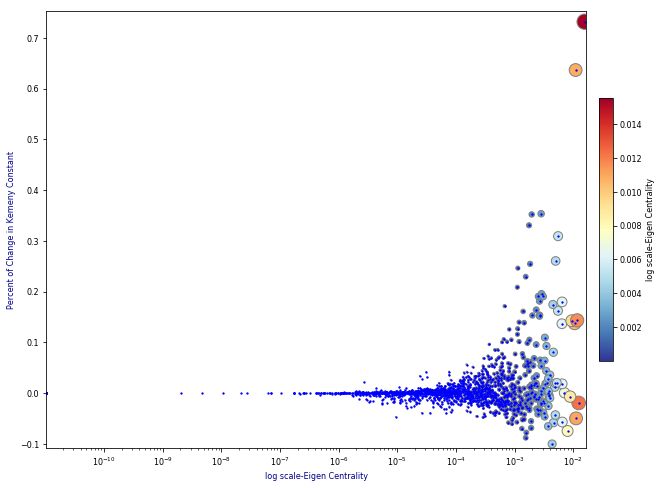

In [50]:
fig = plt.figure(figsize=(10,7))
plt.subplot(1,1,1)
ax = plt.gca()
y = Kemeny_Change_PCT.values[:]
x = pi_norm
p= ax.scatter(x,y,c=pi_norm,s=pi_norm*15000,marker='o',edgecolor='gray', cmap=plt.cm.RdYlBu_r ,alpha=1)
ax.set_xscale('log')
plt.plot(x,y,'ob',markersize=1.3,alpha=.99)
plt.xlabel('log scale-Eigen Centrality',color='darkblue')
plt.ylabel('Percent of Change in Kemeny Constant',color='darkblue')
cb =plt.colorbar(p,shrink=.6,pad=.02)
cb.set_label('log scale-Eigen Centrality')
eps= .022
xmin = x.min() - eps*.1 
xmax = x.max() + eps*.05
ymin = y.min() - eps*.4
ymax = y.max() + eps
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
font = {'size'   : 14.}
plt.rc('font', **font)
plt.legend(bbox_to_anchor=(.91,1.0))
plt.tight_layout()

# Further topics


## Extensions to classical MC:
* **time varying (inhomogeneous) transition matrices**
* **Continuous time**
* **State space variation**
* **State space exploration**

* **Hidden Markov Chains**
* **Random fields**

### Further interesting topics
* **Markov Decision process and Reinforcement Learning**
* **Recurrent neural networks**
* **Hidden Markov Models**
* ** Sampling and Markov Chain Monte-Carlo MCMC**




* **An explanation for the notion of time and state space of our world.**
    * Why time is a one dimensional arrow?
https://www.youtube.com/watch?v=jhnKBKZvb_U

# Next Session on: 

# Data Driven Representation and Markov Chain
## Applications in text modeling such as random text generation
## Combinations with machine learning methods
## ...